<a href="https://colab.research.google.com/github/Albly/High_perfomance_python_lab/blob/main/Fractals/Mandelbrot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Mandelbrot set is the set of complex numbers $c$ for which the function $f(z) = z^2 + c$ doesn't diverge when iterated from $z = 0$.

So, $f(z)\in$ {$0,f(0) ,f(f(0)), \dots $}. 

$n+1$ - element of the Mandelbrot set can be represented as: 
$z_{n+1} = z_n^2 + c$

Here $z \in \mathbb{C}$  and $c \in \mathbb{C}$, where $\mathbb{C}$ is a set of complex numbers.

If for a certain number of steps the sequence remains within the specified limits, then the value of the constant belongs to the set. Using this approach we will have two states and two colors of the Manddelbrot set.

Also, we can apply another approach : we fix the radius, and for each value of the constant, the number of iterations is counted for which the sequence reached it.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from tqdm.notebook import tqdm
from IPython.display import HTML
from numba import njit
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
from tqdm.notebook import tqdm

In [ ]:
#  parameters of picture
size = 1.6
xmin, xmax = -size, size
width = xmax - xmin
ymin, ymax = -size, size
height = ymax - ymin

# value from which we consider that our function is inf
z_abs_max = 300
max_iter = 100


In [ ]:
# Jit version of function
@njit(fastmath=True)
def get_mandelbrot_set_jit(x_pixels = 4000, y_pixels = 4000):
    # Initialise an empty array (corresponding to pixels)
    julia = np.zeros((x_pixels, y_pixels))

    # for every pixel
    for ix in range(x_pixels):
        for iy in range(y_pixels):
            # Map pixel position to a point in the complex plane

            c = complex(ix / x_pixels * width + xmin,
                        iy / y_pixels * height + ymin)
            
            z = complex(0,0)

            iteration = 0
            #while we are in finite area, and max n of iterations is not achieved
            while abs(z) <= z_abs_max and iteration < max_iter:
                z = z**2 + c
                iteration += 1
            iteration_ratio = iteration / max_iter    

            # Set the pixel value to be equal to the iteration_ratio
            julia[ix, iy] = iteration_ratio - iteration
    
    return julia.T

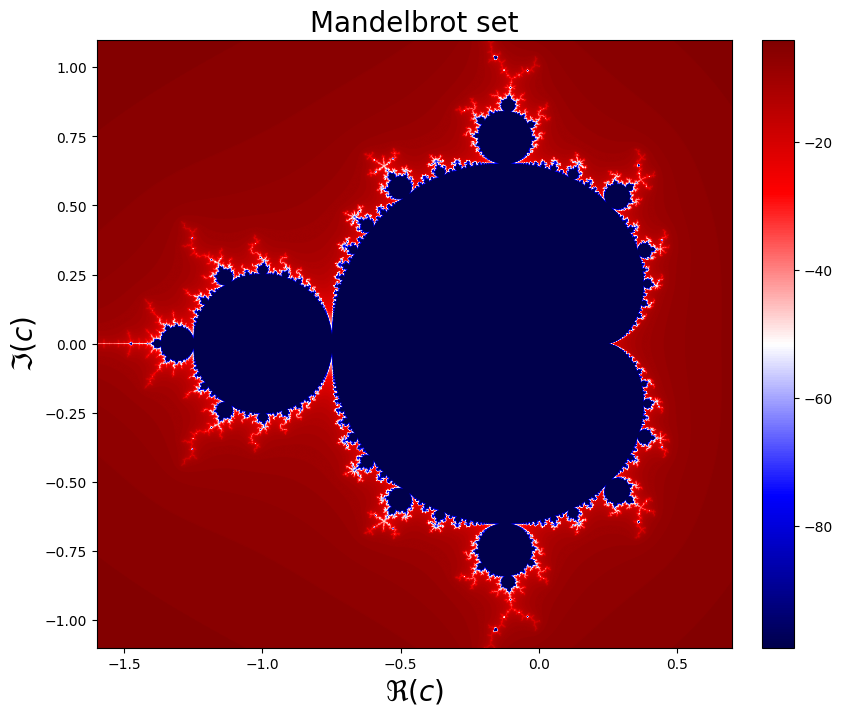

In [ ]:
x_pixels = 4000 #@param
y_pixels = 4000 #@param

#plot the picture using jit version of function
plt.style.use("default")
fig, ax = plt.subplots(figsize=(9, 9))
plt.title("Mandelbrot set", fontsize = 20)
im = plt.imshow(get_mandelbrot_set_jit(x_pixels, y_pixels), cmap=cm.seismic, extent = [-1.6, 1.6, -1.6, 1.6]);
#limit axis to see better the set
plt.xlim(-1.6, 0.7)
plt.ylim(-1.1,1.1)

plt.xlabel("$\Re (c)$", fontsize = 20)
plt.ylabel("$\Im (c)$", fontsize = 20);

#Colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)
plt.colorbar(cax = cax);

In [ ]:
# Simple version of function
def get_mandelbrot_set(x_pixels = 4000, y_pixels = 4000):
    # Initialise an empty array (corresponding to pixels)
    julia = np.zeros((x_pixels, y_pixels))

    # for every pixel
    for ix in range(x_pixels):
        for iy in range(y_pixels):
            # Map pixel position to a point in the complex plane

            c = complex(ix / x_pixels * width + xmin,
                        iy / y_pixels * height + ymin)
            
            z = complex(0,0)

            iteration = 0
            while abs(z) <= z_abs_max and iteration < max_iter:
                z = z**2 + c
                iteration += 1
            iteration_ratio = iteration / max_iter    

            # Set the pixel value to be equal to the iteration_ratio
            julia[ix, iy] = iteration_ratio - iteration
    
    return julia.T

Let's look at how the Jit version of function works faster. 

In [ ]:
# Creating an interval of sizes
# It's going to be calculated with the simple function version,
# So, the interval is short, because it takes very a long time for computing
interval = np.linspace(100,10000,3)

In [ ]:
#print the interval
interval

array([  100.,  5050., 10000.])

In [ ]:
# Run the simple version of the function
np_results = []
for size in tqdm(interval):
    size = int(size)
    t = %timeit -n 1 -r 3 -o -q get_mandelbrot_set(size,size);
    np_results.append(t.best)

In [ ]:
# interval for the jit version of the function
interval2 = np.linspace(100,10000,10)

In [ ]:
# Do the same actions
jit_results = []
for size in tqdm(interval2):
    size = int(size)
    t = %timeit -n 3 -r 2 -o -q get_mandelbrot_set_jit(size,size);
    jit_results.append(t.best)

**Linear scale**

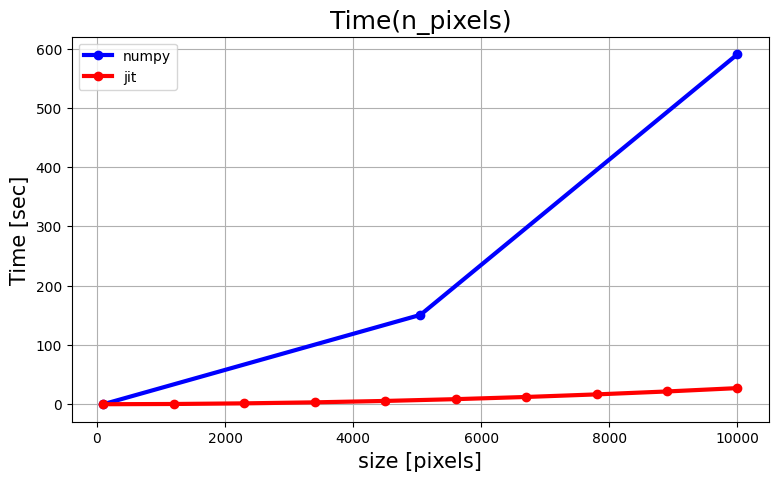

In [ ]:
# It's a result
plt.style.use('default')
plt.figure(figsize=(9,5))
plt.plot(interval,np_results,'o-', label = 'numpy', linewidth= 3., color = 'blue')
plt.plot(interval2, jit_results,'o-', label = 'jit', linewidth= 3., color = 'red')
plt.title("Time(n_pixels)", fontsize = 18)
plt.ylabel("Time [sec]", fontsize = 15)
plt.xlabel("size [pixels]", fontsize = 15)
plt.grid()
plt.legend();

**Log-scale**

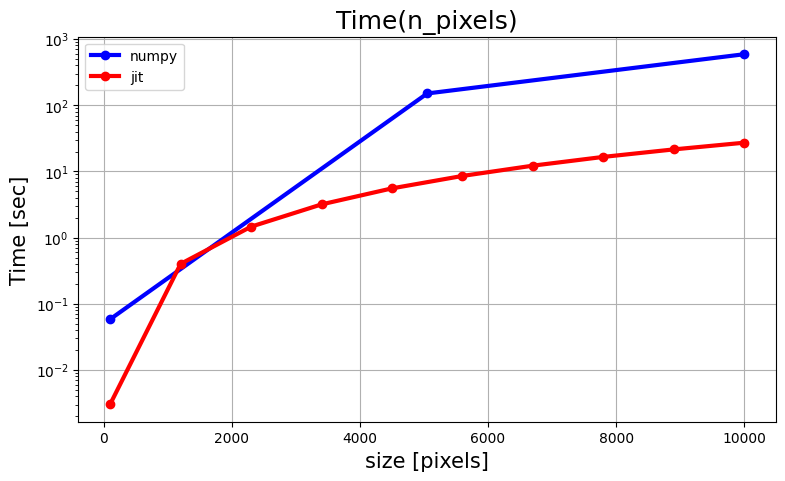

In [ ]:
plt.style.use('default')
plt.figure(figsize=(9,5))
plt.plot(interval,np_results,'o-', label = 'numpy', linewidth= 3., color = 'blue')
plt.plot(interval2, jit_results,'o-', label = 'jit', linewidth= 3., color = 'red')
plt.yscale("log")

plt.title("Time(n_pixels)", fontsize = 18)
plt.ylabel("Time [sec]", fontsize = 15)
plt.xlabel("size [pixels]", fontsize = 15)
plt.grid()
plt.legend();